In [22]:
import pandas as pd
import pickle

In [76]:
# read results for different bucket widths
def get_file(bucket_width: int, size: int, shift=None) -> str:
	return "../res/benchmark/bucket_width_{}_a{}{}.p".format(
		bucket_width, size, "" if shift is None else f"_shift{shift}"
	)

out_dir = 'graphs'

In [94]:
bucket_widths = [1, 2, 3, 4]
shift_n = [None, 4, 8, 16]
sizes = [5, 6, 7]

In [95]:
def create_plot(size: int, shift=None):
	bw_results = []

	for w in bucket_widths:
		with open(get_file(w, size, shift=shift), 'rb') as f:
			res = pickle.load(f)

			# use first 
			for row in res:
				row.insert(0, w)

			bw_results.extend(res)

	columns = ['bucket width', 'player', 'A', 'density', 'metabolism', 'seed', 'ok', 'turns', 'time']
	df = pd.DataFrame(data=bw_results, columns=columns)

	avg_turns = df.groupby(columns[:5]).mean().filter(['turns'])
	avg_turns = avg_turns.reset_index().filter(['bucket width', 'density', 'turns'])
	ax = avg_turns.pivot(index='density', columns='bucket width', values='turns').plot(
		title=f'A={size}, m=1, {"no shifting" if shift is None else f"shift every {shift} turns"}'
	)

	# save fig
	fig = ax.get_figure()
	fig.savefig(
		f'{out_dir}/bucket_width_a{size}{"" if shift is None else f"_shift{shift}"}',
		dpi=300
	)

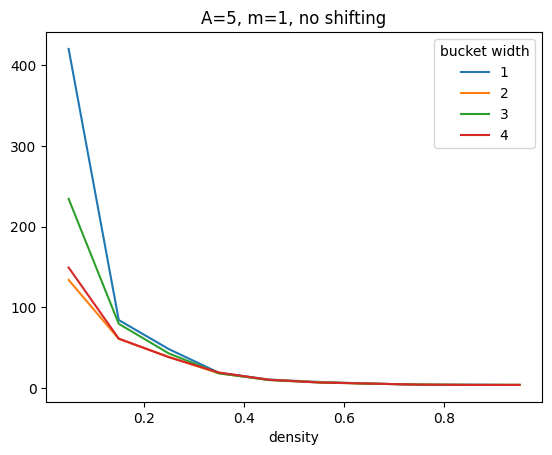

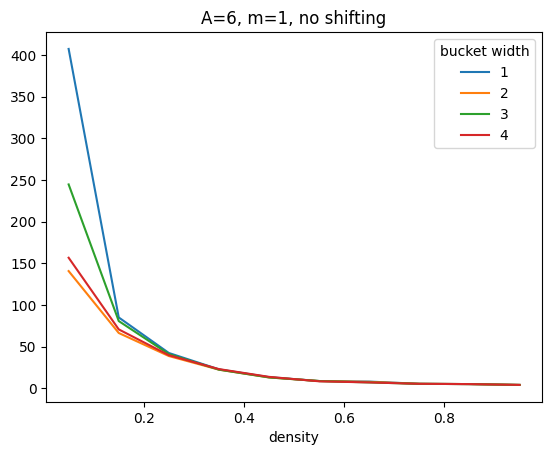

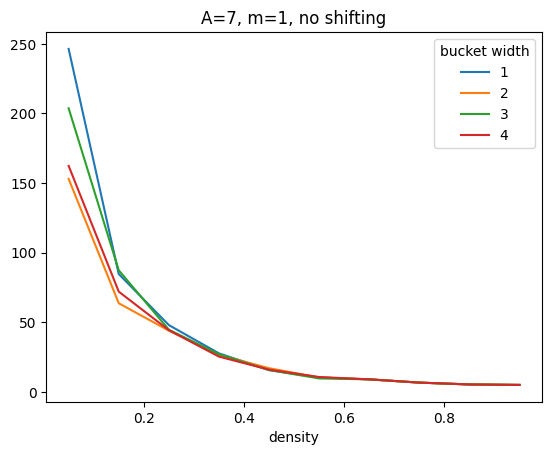

In [96]:
for A in sizes:
	create_plot(A)

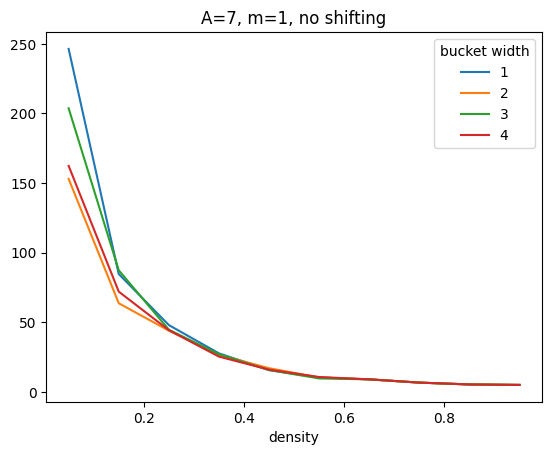

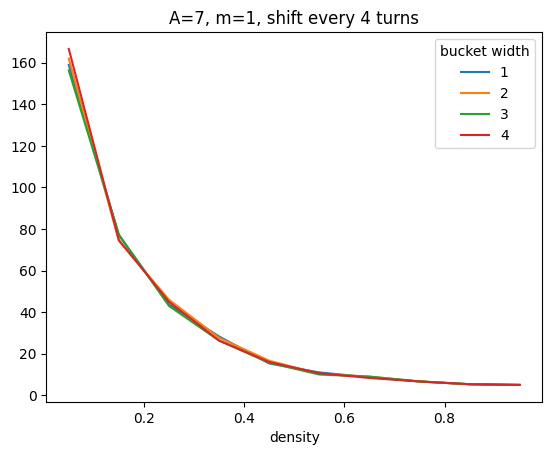

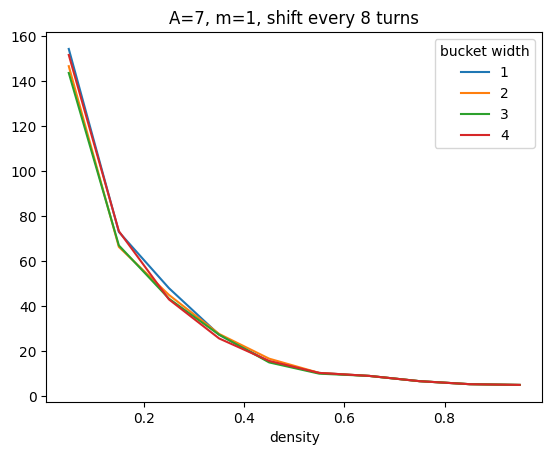

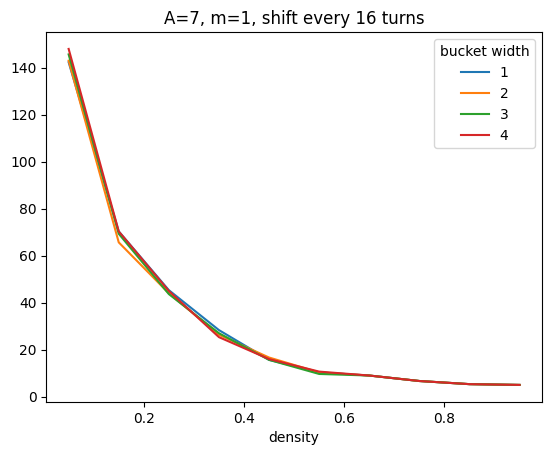

In [97]:
A = 7
for N in shift_n:
	create_plot(A, shift=N)

In [89]:
def create_plot_x_density(bucket_width: int, size: int):
	bw_results = []

	for shift in [None, 4, 8, 16]:
		with open(get_file(bucket_width, size, shift=shift), 'rb') as f:
			res = pickle.load(f)

			# add first column: # turns taken to shift 
			for row in res:
				row.insert(0, shift if shift is not None else 'no shifting')

			bw_results.extend(res)

	columns = ['shift every N turns', 'player', 'A', 'density', 'metabolism', 'seed', 'ok', 'turns', 'time']
	df = pd.DataFrame(data=bw_results, columns=columns)
	avg_turns = df.groupby(columns[:5]).mean().filter(['turns'])
	avg_turns = avg_turns.reset_index().filter(['shift every N turns', 'density', 'turns'])
	ax = avg_turns.pivot(index='density', columns='shift every N turns', values='turns').plot(
		title=f'A={size}, m=1, bucket width={bucket_width}'
	)

	# save fig
	fig = ax.get_figure()
	fig.savefig(
		f'{out_dir}/shiftN_a{size}_bw{bucket_width}',
		dpi=300
	)

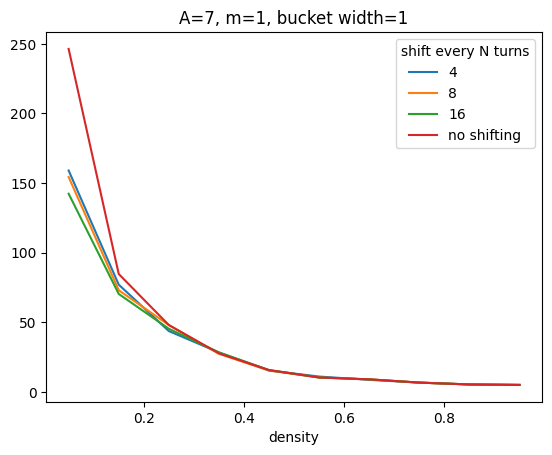

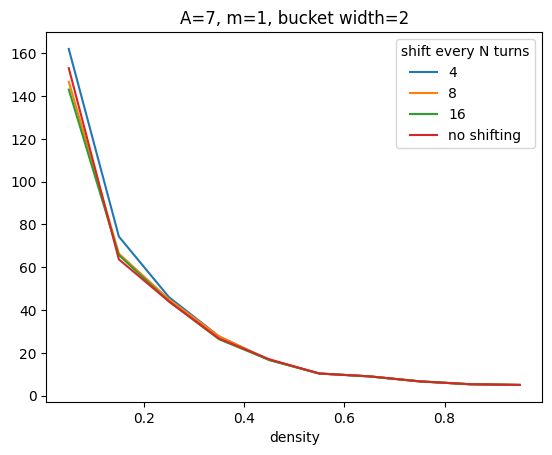

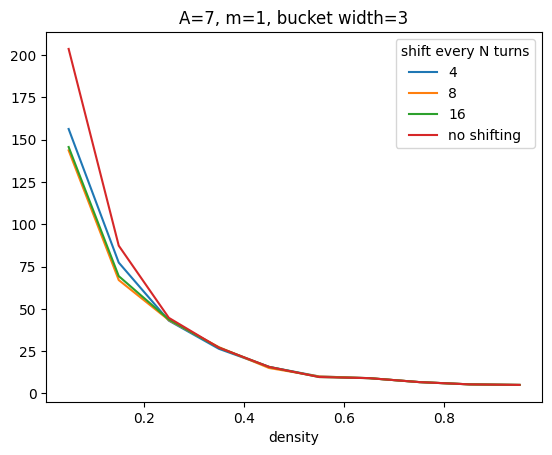

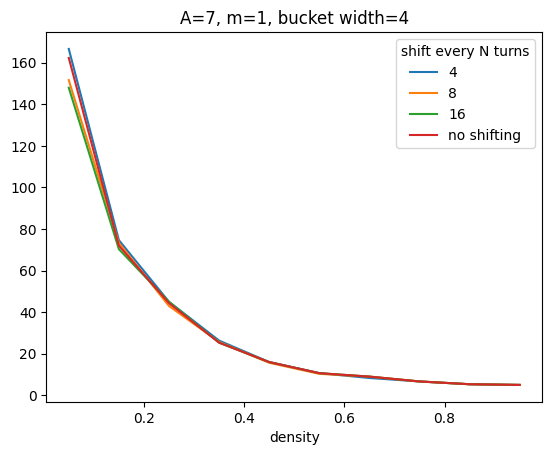

In [98]:
A = 7
for bw in bucket_widths:
	create_plot_x_density(bw, A)